Sofia Santana - Machine Learning Midterm

I will be analyzing data from IMDB and Metacritic for movies released in 2017. I want to explore the following question:

Do higher budgets leads to better opening revenue?

How is Metacritic scores related to the opening revenue of movies released in 2017?

In this analysis, I will investigate whether movies with higher critical ratings (as measured by Metacritic scores) earned more during their opening weekend. My goal is to understand if early box office success correlates with the reception of the movie.

In [24]:
import json

with open('C:/Users/sofia/Desktop/Courses/DATA320/My-secrets.json') as f:
    data = json.load(f)

secret_key = data['mongodb']

print(f"My secret key is {len(secret_key)} characters in length.")
    

My secret key is 74 characters in length.


In [2]:
import pymongo
import certifi

client = pymongo.MongoClient(secret_key, tlsCAFile=certifi.where())
print(f"Using MongoDB version {client.server_info()['version']}.")

my_database = client['DATA320']

print(f"This MongoDB server has the databases {my_database}")

all_collections = my_database.list_collection_names()

print(f"This database has the collections{all_collections}")

Using MongoDB version 8.0.9.
This MongoDB server has the databases Database(MongoClient(host=['ac-racepes-shard-00-01.o5q3fj2.mongodb.net:27017', 'ac-racepes-shard-00-02.o5q3fj2.mongodb.net:27017', 'ac-racepes-shard-00-00.o5q3fj2.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, authsource='admin', replicaset='atlas-g9enq9-shard-0', tls=True, tlscafile='c:\\Users\\sofia\\anaconda3\\lib\\site-packages\\certifi\\cacert.pem'), 'DATA320')
This database has the collections['IMBD_fixed', 'IMBD', 'Metacritic', 'release_date', 'release_date_pipeline', 'IMBD_Pipeline_View', 'IMDB_Pipeline_View_Final', 'IMBD_pipeline_view']


In [6]:
import pandas 

metacritic_view = pandas.DataFrame(my_database.Metacritic.find())

metacritic_view['release_date'] = pandas.to_datetime(metacritic_view['release_date'], errors='coerce')

metacritic_view = metacritic_view[metacritic_view['release_date'].dt.year == 2017]

metacritic_view['score'] = pandas.to_numeric(metacritic_view['score'], errors = 'coerce')

imdb_view = pandas.DataFrame(my_database.IMDB_Pipeline_View_Final.find( {'release_year':2017}))

In [7]:
print("Metacritic Columns:", metacritic_view.columns.tolist())
print("IMDB Columns:", imdb_view.columns.tolist())

Metacritic Columns: ['_id', 'movie_id', 'title', 'release_date', 'description', 'score', 'thumbnail']
IMDB Columns: ['_id', 'cast', 'company', 'director', 'genres', 'id', 'producer', 'release_date', 'runtime', 'title', 'user_rating', 'votes', 'release_year', 'release_month', 'release_day', 'budget_usd', 'gross_sales_usd', 'opening_revenue_usd', 'mpaa_rating']


In [10]:
unified_view = pandas.merge(imdb_view, metacritic_view, how = 'inner', on = 'title')
unified_view.head()

,_id_x,cast,company,director,genres,id,producer,release_date_x,runtime,title,...,budget_usd,gross_sales_usd,opening_revenue_usd,mpaa_rating,_id_y,movie_id,release_date_y,description,score,thumbnail
0,638131f8a23f8f7c1acaa9ee,"Ryan Gosling, Dave Bautista, Robin Wright, Mar...","Alcon Entertainment, Columbia Pictures, Sony, ...",Denis Villeneuve,"Action, Drama, Mystery, Sci-Fi, Thriller",1856101,"Yale Badik, Dana Belcastro, Bill Carraro, Tim ...",2017-10-03,164.0,Blade Runner 2049,...,150000000.0,259344059.0,32753122.0,R,682a31a88f0ac1cbd6232657,19787,2017-10-06,Thirty years after the events of the first fil...,81,https://static.metacritic.com/images/products/...
1,638131faa23f8f7c1acaa9ef,"Daniel Kaluuya, Allison Williams, Catherine Ke...","Universal Pictures, Blumhouse Productions, QC ...",Jordan Peele,"Horror, Mystery, Thriller",5052448,"Jason Blum, Marcei A. Brown, Phillip Dawe, Ger...",2017-01-23,104.0,Get Out,...,5000000.0,255457364.0,33377060.0,R,682a31a88f0ac1cbd623263c,19760,2017-02-24,Now that Chris (Daniel Kaluuya) and his girlfr...,85,https://static.metacritic.com/images/products/...
2,638131fda23f8f7c1acaa9f0,"Jaeden Martell, Jeremy Ray Taylor, Sophia Lill...","New Line Cinema, RatPac-Dune Entertainment, Ve...",Andy Muschietti,Horror,1396484,"Richard Brener, Doug Davison, Toby Emmerich, M...",2017-09-05,135.0,It,...,35000000.0,700381748.0,123403419.0,R,682a31a88f0ac1cbd6232710,19972,2017-09-08,When children begin to disappear in the town o...,69,https://static.metacritic.com/images/products/...
3,63813200a23f8f7c1acaa9f1,"Armie Hammer, Timothée Chalamet, Michael Stuhl...","Frenesy Film Company, La Cinéfacture, RT Featu...",Luca Guadagnino,"Drama, Romance",5726616,"Naima Abed, Margarethe Baillou, Tom Dolby, Sus...",2017-01-22,132.0,Call Me by Your Name,...,NaN,41888660.0,NaN,R,682a31a88f0ac1cbd623261e,19730,2017-11-24,"It’s the summer of 1983 in the north of Italy,...",93,https://static.metacritic.com/images/products/...
4,63813203a23f8f7c1acaa9f2,"Keanu Reeves, Riccardo Scamarcio, Ian McShane,...","Summit Entertainment, TIK Films, Thunder Road ...",Chad Stahelski,"Action, Crime, Thriller",4425200,"Robert Bernacchi, Kevin Scott Frakes, Basil Iw...",2017-01-30,122.0,John Wick: Chapter 2,...,40000000.0,171539887.0,30436123.0,R,682a31a88f0ac1cbd62326af,19875,2017-02-10,Legendary hitman John Wick is forced to back o...,75,https://static.metacritic.com/images/products/...


In [26]:
import statsmodels.formula.api as smf

ols_model = smf.ols(
    formula="opening_revenue_usd ~ score + budget_usd + runtime", 
    data=unified_view
).fit()

print(ols_model.summary())

                             OLS Regression Results                            
Dep. Variable:     opening_revenue_usd   R-squared:                       0.630
Model:                             OLS   Adj. R-squared:                  0.618
Method:                  Least Squares   F-statistic:                     53.92
Date:                 Sun, 01 Jun 2025   Prob (F-statistic):           1.93e-20
Time:                         22:16:29   Log-Likelihood:                -1822.7
No. Observations:                   99   AIC:                             3653.
Df Residuals:                       95   BIC:                             3664.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.701e+07    1.8e+07     -1.49

In this OLS model, we can see that the R-Squared is 63%, this means that the variation in opening revenue can be explained by 3 variables in the model. (score, budget and runtime).

We learn thants to the p - value that the budget is significant in the outcome, the score is borderline and runtime is not really helpful.

The model also shows that we may have correlated predictors.

In [ ]:
from numbers import Number 

def format_currency(amount: Number, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}K"

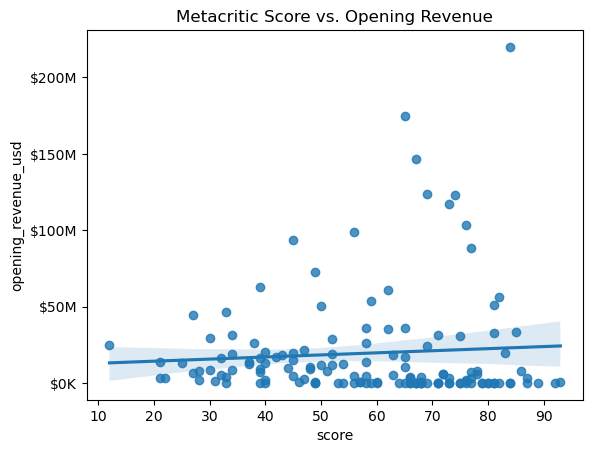

In [44]:

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

currency_formatter = FuncFormatter(format_currency)

sns.regplot(data=unified_view, x="score", y="opening_revenue_usd")
plt.title("Metacritic Score vs. Opening Revenue")
plt.gca().yaxis.set_major_formatter(currency_formatter)
plt.show()

This first plot explores the direct relationship between Metacritic scores and opening weekend revenue, I can see that it has a slight positive correlation, but the relationship is weak. Most movies, regardless of score, cluster near the lower end of the revenue axis. A few high outluers exist across a wide score range, suggesting that good reviews do not predict strong openings, and therefore initial earnings of a movie in 2017 did not mean a good movie.

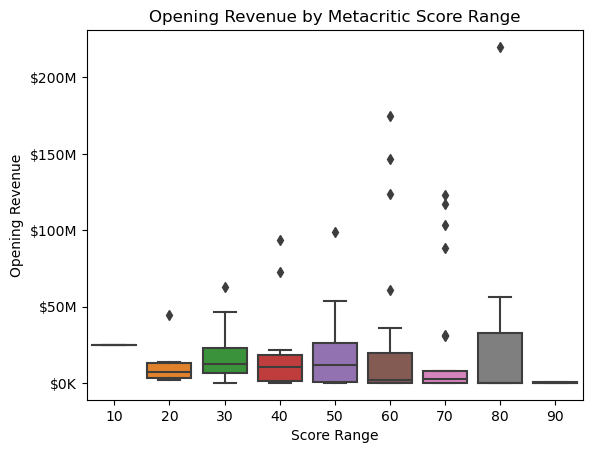

In [45]:
unified_view["score_bin"] = (unified_view["score"] // 10) * 10  # Bin scores
sns.boxplot(data=unified_view, x="score_bin", y="opening_revenue_usd")
plt.title("Opening Revenue by Metacritic Score Range")
plt.xlabel("Score Range")
plt.ylabel("Opening Revenue")
plt.gca().yaxis.set_major_formatter(currency_formatter)
plt.show()

This plot is the same as the previous one, only in a different format that could bring more clarity visually. While there is some variation, there is no strong, consistent pattern connecting higher scores to higher revenue. Some mid-range score groups 50 or 60 show high-earning outliers, but high-scoring movies 80 and 90 do not have really major openings. So, good reviews may not be a strong predictor of opening weekend earning success. It could be that marketing, franchise recognition, or popularity of actors play a bigger role in the first weekend revenue a movie generated in 2017.

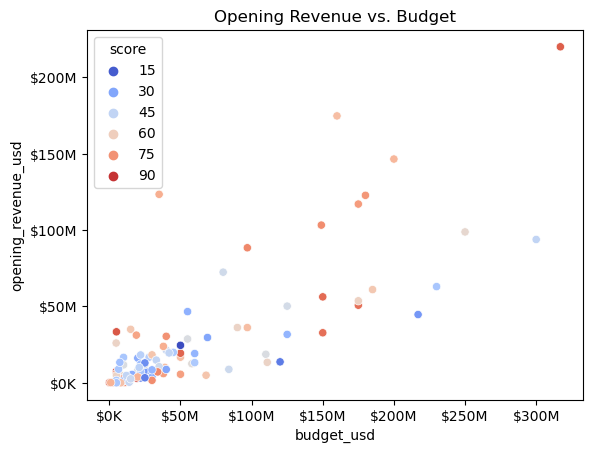

In [47]:
sns.scatterplot(data=unified_view, x="budget_usd", y="opening_revenue_usd", hue="score", palette="coolwarm")
plt.title("Opening Revenue vs. Budget")
plt.gca().yaxis.set_major_formatter(currency_formatter)
plt.gca().xaxis.set_major_formatter(currency_formatter)
plt.show()

This scatter plot shows the relationship between a movie's budget and its opening weekend revenue, with Metacritic score used as the color.
From the chart, we can see a clear positive trend, so movies with larger budgets generally earned more on their opening weekends in 2017. However, the color distribution (representing Metacritic score) is really scattered across the chart, with no clear pattern. Both highly rated and lower-rated movies can appear at different budget levels, suggesting that while budget is a predictor of revenue, the Metacritic score does not clearly influence the opening weekend earnings.

In this analysis I wanted to know if Metacritic scores are related to the opening weekend revenue of movies released in 2017. This way I could tell if movies that are actually good make people go and see them on the opening weekend. Making the comparison with different charts I discovered that these scores have only a weak relationship with opening performance. The regression plot showed a slight positive trend, but with a low and high revenue movies across all score levels. Meanwhile, the budget comparison made it clear that this is a more reliable predictor of opening revenue, high budget movies lead to high opening revenue. Overall, good reviews may help in long term, but they don't influence how well a movie performs on its opening weekend, at least in 2017.
It is very interesting to learn this because it could help understand how releases work, what actually influences them and what movies should focus on to get a good reception of their movie.